In [1]:
import os
import random
import numpy as np
import pandas as pd
from PIL import Image
import autokeras as ak
import tensorflow as tf
from numpy import asarray
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tensorflow.keras.callbacks import CSVLogger
from sklearn.datasets import load_files
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

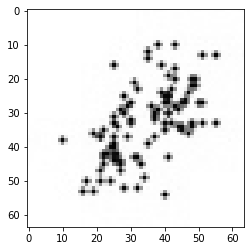

In [7]:
#create images array
directory = "imagesselectedset"
images = []
for filename in os.listdir(directory):
        
    instance = os.path.join(directory, filename)
    if instance.endswith('.jpg'):
        #im = Image.open(instance)
        im = Image.open(instance)
        im1 = im.convert('L')
        pix = im.load()
        width, height = im.size
        pixel_values = list(im.getdata())
        imgplot = plt.imshow(im1, cmap='Greys_r')
        #print("num pixels is %s" %(len(pixel_values)))
        #print("width and height is %s"%width, height)
        
        data = asarray(im1)
        images.append(data)
        # summarize shape
images2 = np.asarray(images)
images2 = images2.reshape((images2.shape[0], 64, 64))


In [ ]:
#read the labels
npdf = pd.read_csv('metadata/selectedset-TSP.csv')
print(npdf['newLabel'].value_counts())
source = npdf.newLabel

In [ ]:
X = images2.astype('float32')
X /= 255
print('X_train shape:', X.shape)
y = source

In [5]:
tf_callbacks = [
    tf.keras.callbacks.CSVLogger("TSPimagesTraining.csv", separator=",", append=False),
    tf.keras.callbacks.TensorBoard(log_dir='./logs',profile_batch = 100000000),
]

# Autkeras Model

In [ ]:
# test Model
clf = ak.ImageClassifier(overwrite=True, max_trials=1)
# Supervised training of the model
clf.fit(X, y, epochs=1, callbacks=tf_callbacks)

In [7]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 64, 64)            0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 64, 64, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 64, 64, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0     

In [ ]:
#train the model using 10 folds with 100 epoch per fold
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
all_tests = []
all_predictions = []

for train_index, test_index in cv.split(X, y):
  #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = ak.ImageClassifier(overwrite= False, max_trials=1)
  # Supervised training of the model
    print("Start training")
    clf.fit(X_train, y_train, epochs=100, callbacks=tf_callbacks)

    print("Prendictions on unseen data")
    predicted_y = clf.predict(X_test)
    all_tests.append(y_test)
    all_predictions.append(predicted_y)
    #print(predicted_y)
    report = classification_report(y_test, predicted_y)
    print(report)

In [9]:
predictions = []
for sublist in all_predictions:
    for item in sublist:
        predictions.append(int(item))

tests = []
for sublist in all_tests:
    for item in sublist:
        tests.append(item)

500


In [13]:
report = classification_report(predictions, tests)
print(report)

              precision    recall  f1-score   support

           0       0.49      0.50      0.50      2424
           1       0.52      0.50      0.51      2576

    accuracy                           0.50      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       0.50      0.50      0.50      5000



In [14]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import f1_score

print("Accuracy:",metrics.accuracy_score(predictions, tests))
precision = precision_score(predictions, tests)
recall = recall_score(predictions, tests)
f1_score = f1_score(predictions, tests)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F1-score: %.3f' % f1_score)

Accuracy: 0.5032
Precision: 0.518
Recall: 0.503
F1-score: 0.511
